$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

## The Wonderful World of ML - Session 5 Discussion: Trees

Let's start by taking a look a couple of simple trees. The data for the tree in **Figure 1.A** was taken from the **ISLR** package in **R** and can be found [here](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/HittersISLR.csv).  The data for the tree in **Figure 1.B** was originally downloaded from [here](http://www-bcf.usc.edu/~gareth/ISL/Heart.csv) and can be found [here](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/Heart.csv).

<img src="https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/graphics/Trees_03_Fig1.jpg">

Examples of a regression tree and a classification tree are shown in Figure 1.A and 1.B respectively.  While both of these trees are binary (only split 2 ways at each non-leaf node), they don't have to as shown in **Figure 2.** below.

<img src="https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/graphics/Trees_04_Fig2.jpg">

Besides being represented as a flowchart, Figure 2. illustrates each node being split by a catagorical variable instead of being split on a continuous variable as shown in Figure 1.A and parts of Figure 1B.

One of the main strengths of decision trees is their interpretablitily.  Once we have trained/built our tree, to make a prediction with new data, all we have to do is follow the path from the root node to a leaf node.

### Make a prediction with a tree

#### Example 1.

Assume that the leaf nodes in Figure 1.A are log (base 10) values of salaries for baseball players.  What would the model predict for the salary of a player that has been in the league 7 years and had 113 hits?

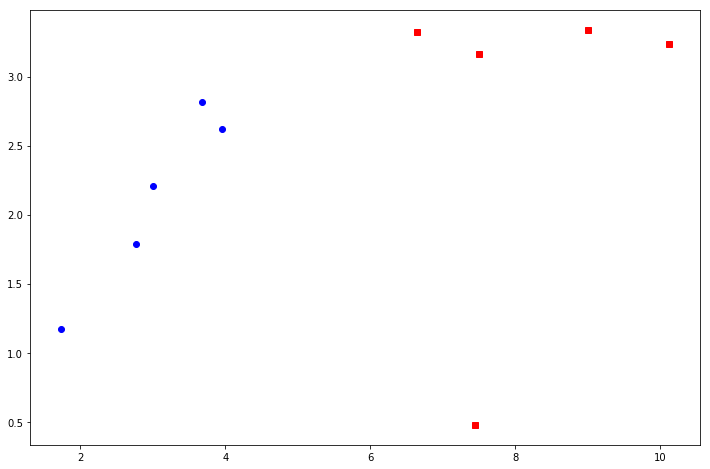

In [22]:
import sys
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(0, '../../Python/')
import BinaryDecisionTree as b
import matplotlib.pyplot as plt
import numpy as np
# test data from http://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
dataset = np.array([[2.771244718,1.784783929,0],
                    [1.728571309,1.169761413,0],
                    [3.678319846,2.81281357,0],
                    [3.961043357,2.61995032,0],
                    [2.999208922,2.209014212,0],
                    [7.497545867,3.162953546,1],
                    [9.00220326,3.339047188,1],
                    [7.444542326,0.476683375,1],
                    [10.12493903,3.234550982,1],
                    [6.642287351,3.319983761,1]])

# Visualize the test data
d0_x1 = dataset[:5,0]
d0_x2 = dataset[:5,1]
d1_x1 = dataset[5:,0]
d1_x2 = dataset[5:,1]
fig = plt.figure(figsize=(12, 8))  # width, height
ax = fig.add_subplot(111)
ax.plot(d0_x1, d0_x2, 'bo', label='class 0')
ax.plot(d1_x1, d1_x2, 'rs', label='class 1')
fig

#split = b.get_split(dataset)
#print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

In [ ]:
def giniIndex():
    """ Computes and returns the Gini index for a split dataset.
    
    groups - a nested sequence of lists or tuples. Each element in the 
             sequence is a list or tuple
    class_values - 
    """
    gini = 0
    for class_value in class_values:
        for group in groups:
            group_count = len(group)
            if size == 0:
                continue
            # compute the proportion of the class_value within group
            prop = [row[-1] for row in group].count(class_value) / float(size)
            gini += (prop * (1.0 - prop))